# Atividade Kmeans
Daniel Pontes Nery
GU3008347

In [9]:
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns
from kneed import KneeLocator #técnica do cotovelo
from sklearn.datasets import make_blobs #cria um grupo de dados sitético
from sklearn.cluster import KMeans #utiliza para agrupar os dados
from sklearn.metrics import silhouette_score #número de grupamentos
from sklearn.preprocessing import StandardScaler, LabelEncoder #padronização dos dados

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

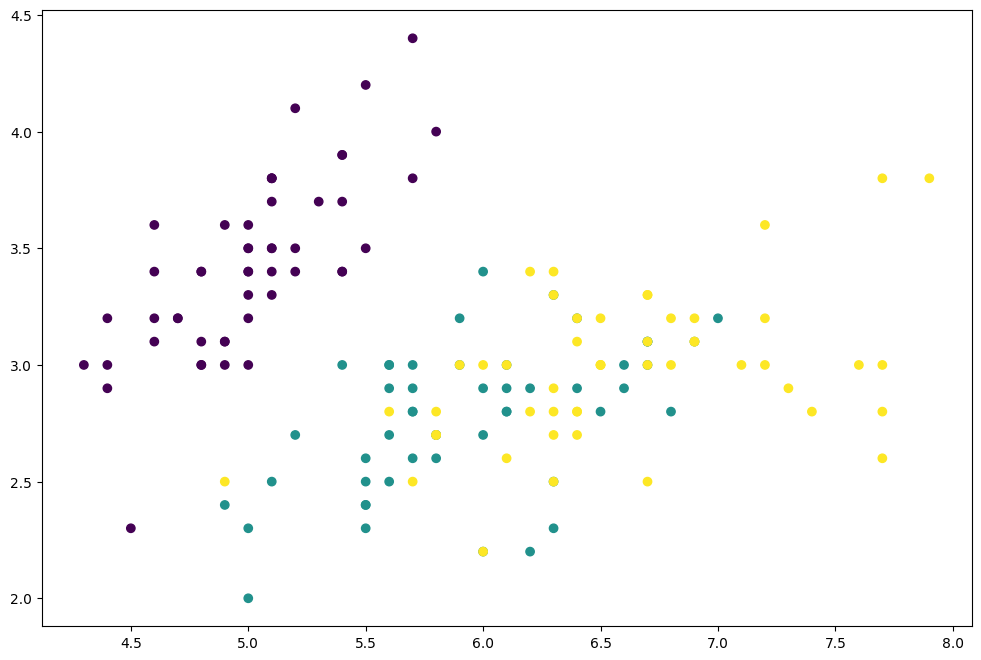

In [15]:
Caracteristicas, Labels = make_blobs(
n_samples= 300,
centers= 4,
cluster_std= 1.2,
random_state= 56)

iris = sns.load_dataset('iris')
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

Labels = iris["species"].values
Caracteristicas = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
print(Caracteristicas)
print(Labels)


plt.figure(figsize=(12,8))
plt.scatter(Caracteristicas[:,0], Caracteristicas[:,1], c=Labels)

In [16]:
scalar = StandardScaler()
scalar_caracteristicas = scalar.fit_transform(Caracteristicas)
scalar_caracteristicas[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [17]:
Caracteristicas[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [100]:
kmeans = KMeans(
init='random',
n_clusters=4,
n_init=20,
max_iter=800,
random_state=56)

In [101]:
kmeans.fit(scalar_caracteristicas)

KMeans(init='random', max_iter=800, n_clusters=4, n_init=20, random_state=56)

In [89]:
kmeans.inertia_

139.82049635974974

In [90]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [91]:
kmeans.n_iter_

7

In [92]:
kmeans.labels_[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
Labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

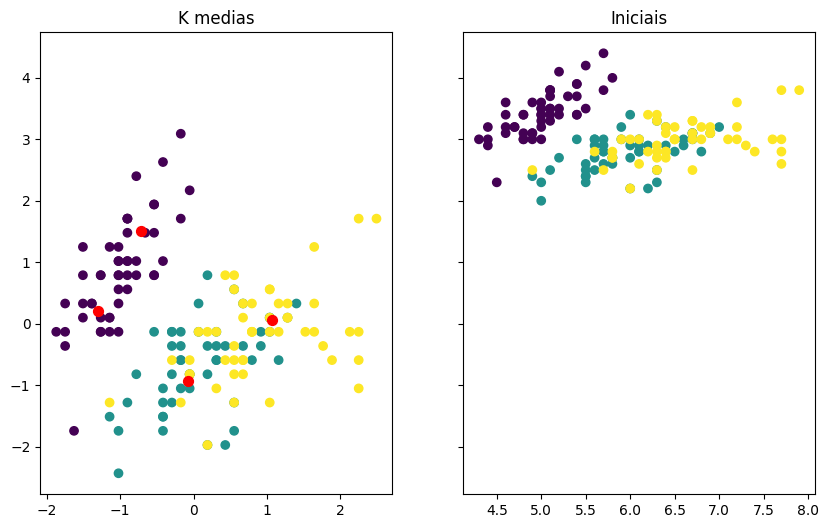

In [102]:
f,(eixo1, eixo2)=plt.subplots(1, 2, sharey=True, figsize=(10,6))
eixo1.set_title('K medias')
eixo1.scatter(scalar_caracteristicas[:,0],
scalar_caracteristicas[:,1],
c=Labels)
eixo1.scatter(kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
s=50, c='red', label='Centroides')
eixo2.set_title('Iniciais')
eixo2.scatter(Caracteristicas[:,0],Caracteristicas[:,1], c=Labels)

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Labels, kmeans.labels_))

[[25 25  0  0]
 [ 0  0 12 38]
 [ 0  0 39 11]
 [ 0  0  0  0]]


In [104]:
print(classification_report(Labels, kmeans.labels_))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        50
           1       0.00      0.00      0.00        50
           2       0.76      0.78      0.77        50
           3       0.00      0.00      0.00         0

    accuracy                           0.43       150
   macro avg       0.44      0.32      0.36       150
weighted avg       0.59      0.43      0.48       150



c:\Users\danie\projects\examples\python\data-science-python\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\projects\examples\python\data-science-python\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\danie\projects\examples\python\data-science-python\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [97]:
kmeans_valores = {
'init':'random',
'n_init':10,
'max_iter':300,
'random_state':56,
}

In [98]:
SER=[]
for k in range (1,11):
    kmeansCT = KMeans(n_clusters=k, **kmeans_valores)
    kmeansCT.fit(scalar_caracteristicas)
    SER.append(kmeansCT.inertia_)

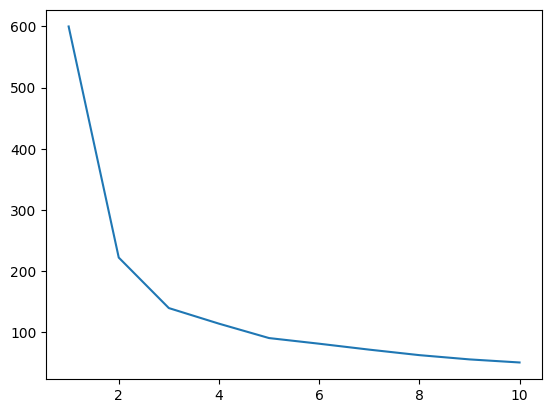

In [99]:
plt.plot(range(1,11), SER)